In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# 加载数据集，
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    xArr = []  # x数据集
    yArr = []  # y数据集
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)

        # 最后一列是y的值
        yArr.append(float(curLine[-1]))
    return xArr, yArr

In [ ]:
# 计算回归系数w
def standRegres(xArr,yArr):
    '''
    计算回归系数
    :param xArr:   x数据集 
    :param yArr:   y数据集
    :return:       回归系数
    '''
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T  # 由于yArr是一个列表， 而yMat需要的是一个列向量， 所以需要转置
    xTx = xMat.T*xMat

    # 前提条件， xTx不可逆
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

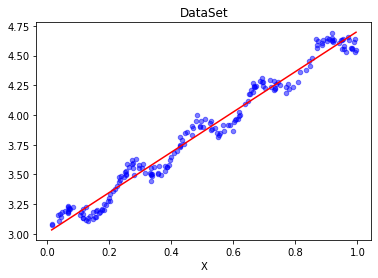

In [ ]:
def plotRegression(xArr, yArr, ws):
    """
    函数说明:绘制回归曲线和数据点
    """
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    xCopy = xMat.copy()                                                    #深拷贝xMat矩阵
    xCopy.sort(0)                                                          #排序 如果直线的数据点次序混乱，绘图的时候会出现问题。所以先将点按照升序排列
    yHat = xCopy * ws                                                      #计算对应的y值
    fig = plt.figure()
    ax = fig.add_subplot(111)                                              #添加subplot
    ax.plot(xCopy[:, 1], yHat, c = 'red')                                  #绘制回归曲线
    ax.scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                   #绘制title
    plt.xlabel('X')
    plt.show()

if __name__ == '__main__':

    # 加载数据集
    xArr, yArr = loadDataSet('ex0.txt')
    # 计算回归系数
    ws = standRegres(xArr, yArr)

    # 绘制回归曲线
    plotRegression(xArr, yArr, ws)

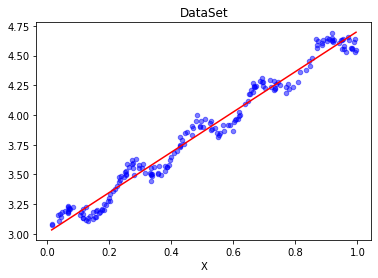

[[1.         0.98647356]
 [0.98647356 1.        ]]


In [ ]:
if __name__ == '__main__':

    # plotDataSet()
    # 加载数据集
    xArr, yArr = loadDataSet('ex0.txt')
    # 计算回归系数
    ws = standRegres(xArr, yArr)

    # 绘制回归曲线
    plotRegression(xArr, yArr, ws)

    # 使用corrcoef方法，来比较预测值和真实值的相关性。 
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    yHat = xMat * ws
    # 计算相关系数(需要保证两个向量都是行向量)
    print(np.corrcoef(yHat.T, yMat))

In [ ]:
#局部加权线性回归
def lwlr(testPoint,xArr,yArr,k=1.0):
    '''
    :param testPoint:   测试样本点
    :param xArr:        x数据集
    :param yArr:        y数据集
    :param k:           高斯核的k,自定义参数 
    :return:            回归系数
    '''
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))         #创建权重对角矩阵， 是一个方阵， 阶数等于样本点个数

    #遍历数据集 计算每个样本的权重
    for j in range(m):  # next 2 lines create weights matrix
        diffMat = testPoint - xMat[j, :]  
        # 每个点高斯核对应的权重
        weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k ** 2))       # 权重值大小以指数级别衰减
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [ ]:
def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    '''
    :param testArr:  测试数据集x
    :param xArr:     x数据集
    :param yArr:     y数据集
    :param k:        高斯核的k, 自定义参数
    :return: 
    '''
    m = np.shape(testArr)[0]       # 测试数据集的大小
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

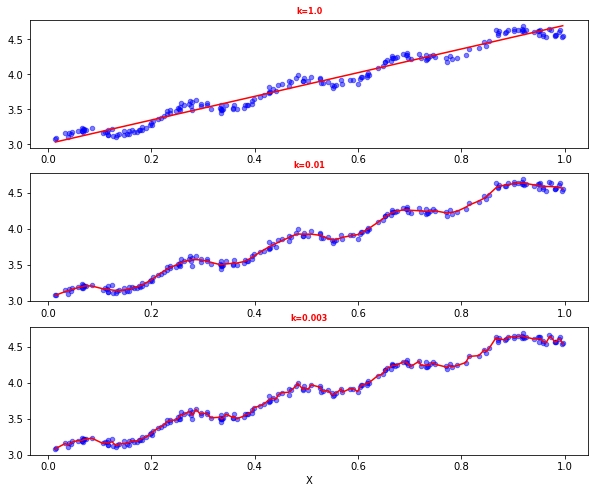

In [ ]:
def plotlwlrRegression():
    """
    函数说明:绘制多条局部加权回归曲线
    """
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)                            #根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)                            #根据局部加权线性回归计算yHat
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)                            #根据局部加权线性回归计算yHat
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)                                        #排序，返回索引值
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(10,8))
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')                        #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')                        #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')                        #绘制回归曲线
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'k=1.0')
    axs1_title_text = axs[1].set_title(u'k=0.01')
    axs2_title_text = axs[2].set_title(u'k=0.003')
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')
    plt.xlabel('X')
    plt.show()




if __name__ == '__main__':
    plotlwlrRegression()